# Ch2 预备知识

## 2.1 数据操作

#### 为完成数据操作， 我们需要某种方法来存储和操作数据。 通常， 我们需要做两件重要的是： 一是获取数据， 二是将数据读入计算机后对其进行操作

#### 先来介绍n维数组（n阶数组、具有n个轴的）， 也称为张量（tensor）。 whatever 用哪个深度学习框架， 它都有张量类， 都与NumPy中的ndarray相似。 但深度学习框架支持GPU运算

### 2.1.1 入门


#### 了解一些会用到的基本的数值计算工具。

In [1]:
import torch

#### 具有一个轴的张量叫做向量， 两个轴的叫矩阵， 两个以上没有特定名称
#### 可以用arange创建一个行向量x
#### 张量内的每个值叫做元素（element）

In [2]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### 用shape访问张量的形状

In [3]:
x.shape

torch.Size([12])

#### 如果质量知道张量中的元素的总数， 即形状中所有元素乘积， 可以检查它的大小（size）

In [4]:
x.numel()

12

#### 要想改变一个张量的形状而不改变元素数量和元素值， 可以调用reshape函数。 形状改变， 但其元素值不变

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

#### tips: 不需要手写每个维度， torch会自动补全，不想写的那维用-1来代替

#### 有时我们想要全0或者全1、 其他常量或者从特征分布中随机采样的数字来初始化矩阵。 我们可以创建一个形状为（2， 3， 4）的张量， 其中所有元素都设置为0

In [6]:
torch.zeros((2, 3, 4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

#### 同样，我们可以创建一个形状为(2,3,4)的张量，其中所有元素都设置为1

In [7]:
torch.ones((2, 3, 4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

#### 有时我们想通过从某个特定的概率分布中随机采样来得到张量中每个元素的值
#### randn使每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样

In [8]:
torch.randn(3, 4)

tensor([[ 0.1574, -1.1357,  0.1220, -0.2893],
        [ 0.6371,  1.4886,  0.3351,  0.2703],
        [ 0.1449, -0.4756,  0.8136,  0.5345]])

#### 我们还可以通过提供包含数值的Python列表（或嵌套列表），来为所需张量中的每个元素赋予确定值。外层的列表对应于轴0，内层的列表对应于轴1。

In [9]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### 2.1.2 运算符

#### 我们想在这些数据上执行数学运算，其中最简单且最有用的操作是按元素（elementwise）运算。
#### 它们将标准标量运算符应用于数组的每个元素
#### 可以基于任何从标量到标量的函数来创建按元素函数。

#### 在数学表示法中，我们将通过符号$$f : R → R $$来表示一元标量运算符（只接收一个输入）。means一进一出

#### 同样，我们通过符号$$f : R, R → R $$表示二元标量运算符，means该函数接收两个输入，并产生一个输出。

#### 给定同一形状的任意两个向量u和v和二元运算符f，我们可以得到向量$$c = F(u, v)$$。具体计算方法是$$c_i ← f(u_i, v_i)$$，其中ci、ui和vi分别是向量c、u和v中的元素。

#### 按元素运算： 将标准的标量运算符应用于数组的每个元素， 对两个数组按元素做二元运算。

In [10]:
x = torch.tensor([1.0, 2, 4, 8]) 
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

##### 像求幂这样的一元运算符

In [11]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

#### 连接： 可以把多个张量连结(concatenate)在一起,把它们端对端地叠起来形成一个更大的张量

In [12]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0) # 沿行连接
torch.cat((X, Y), dim=1) # 沿列连接

tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

#### 逻辑运算： 可以用来构建二元张量,对每个位置比较两个张量的值

In [13]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

#### 求和： 对张量的所有元素进行求和,得到一个单元素的张量

In [14]:
X.sum()

tensor(66.)

### 2.1.3 广播机制

#### 在某些情况下，即使形状不同 ，我们仍然可以通过调用广播机制（broadcasting mechanism）来执行按元素操作，其工作方式如下：
##### 1. 通过适当复制元素来扩展一个或两个数组，以便在转换之后，两个张量具有相同的形状；
##### 2. 对生成的数组执行按元素操作。

#### 多数情况下，我们将沿着数组中长度为1的轴进行广播

In [15]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

##### 由于维度不匹配，所以会广播成更大的3x2矩阵

In [16]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### 2.1.4 索引和切片

#### like python中的数组，张量中的元素可以通过索引访问。且与数组一样，第一个元素的索引是0，最后一个元素索引是‐1；可以指定范围以包含第一个元素和最后一个之前的元素。

##### 用[-1]取最后一个元素， 用[1,3]取第2到3的元素

In [17]:
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

##### 还可以通过指定索引来将元素写入矩阵

In [18]:
X[1, 2] = 9
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

##### 如果我们想为多个元素赋值相同的值，我们只需要索引所有元素，然后为它们赋值

In [19]:
X[0:2, :] = 12 # 冒号表示沿轴的所有元素
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### 2.1.5 节省内存

#### 运行一些操作可能会导致为新结果分配内存
##### 例如，如果我们用Y = X + Y，我们将取消引用Y指向的张量，而是指向新分配的内存处的张量

##### 我们用Python的id()函数演示了这一点，它给我们提供了内存中引用对象的确切地址
##### 运行Y = Y + X后，我们会发现id(Y)指向另一个位置，是因为python计算完后为结果分配了新内存再存到Y

In [20]:
before = id(Y)
Y = Y + X
id(Y) == before

False

#### 这不可取，原因有2
##### 1:机器学习中可能有数兆的数据，且一秒更新多参，因此我们希望原地执行更新
##### 2:如果不原地更新，某些代码可能引用到旧参

#### 我们可以使用切片表示法将操作的结果分配给先前分配的数组

In [21]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 140227354413552
id(Z): 140227354413552


#### 如果在后续计算中没有重复使用X，我们也可以使用X[:] = X + Y或X += Y来减少操作的内存开销。 ⭐️应该注意+= 和 = + 的区别

In [22]:
before = id(X)
X += Y
id(X) == before

True

### 2.1.6 转换为其他Python对象

#### 将深度学习框架定义的张量转换为NumPy张量（ndarray）很容易，反之也同样容易。torch张量和numpy数组将共享它们的底层内存，就地操作更改一个张量也会同时更改另一个张量
#### Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other. (From Torch Docs)

In [23]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

#### 要将大小为1的张量转换为Python标量，可以调用item函数或Python的内置函数

In [24]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 小结
#### 深度学习所用来存储和操作的数据是张量（n维数组），提供了运算、广播※、索引和切片、节省内存、转换为python对象等功能。 

In [25]:
# test1
X > Y, X < Y

(tensor([[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]),
 tensor([[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]]))

## 2.2 数据预处理

#### 为用深度学习解决现实生活中的问题，我们经常从预处理原始数据开始， 而不是从准备好的张量格式数据开始
#### 在Python中常用的数据分析工具中，我们通常用pandas包。与庞大的Python生态系统中许多扩展包一样，pandas可以与张量兼容。因此接下来介绍用pandas预处理原始数据

### 2.2.1 读取数据集

#### 举个例子， 我们先创建一个人工数据集，并存储在CSV（逗号分隔值）文件 ../data/house_tiny.csv中。处理方式大体适用于其他格式的数据。

In [26]:
import os
os.makedirs(os.path.join('', 'data'), exist_ok=True)
data_file = os.path.join('', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n') # 列名
    f.write('NA,Pave,127500\n') # 每行表示一个数据样本
    f.write('6,Liber,106700\n')
    f.write('4,NA,178100\n')
    f.write('NA,Rock,140000\n')

#### 要从创建的CSV文件中加载原始数据集， 我们导入pandas包并调用read_csv函数

In [27]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms  Alley   Price
0       NaN   Pave  127500
1       6.0  Liber  106700
2       4.0    NaN  178100
3       NaN   Rock  140000


### 2.2.2 处理缺失值

#### NaN项代表缺失值。 处理缺失的数据的典型方法包括插值法和删除法

#### 在这里，我们将考虑插值法
#### 通过位置索引iloc，我们将data分成inputs和outputs，其中前者为data的前两列，而后者为data的最后一列。对于inputs中缺少的数值，我们用同一列的均值替换“NaN”项。

In [28]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())

/var/folders/0x/15_qt5ln5qn1y1nln4knxp940000gn/T/ipykernel_34046/2829519728.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  inputs = inputs.fillna(inputs.mean())


In [29]:
inputs

,NumRooms,Alley
0,5.0,Pave
1,6.0,Liber
2,4.0,NaN
3,5.0,Rock


#### 对于inputs中的类别值或离散值，我们将“NaN”视为一个类别。 因为只有Alley列Liber和NA两类，pandas可以自动将此列转换为两列“Alley_Liber”和“Alley_nan”，因此缺少Alley值的Alley_nan都会设置为0

In [30]:
inputs = pd.get_dummies(inputs, dummy_na=True)
inputs

,NumRooms,Alley_Liber,Alley_Pave,Alley_Rock,Alley_nan
0,5.0,0,1,0,0
1,6.0,1,0,0,0
2,4.0,0,0,0,1
3,5.0,0,0,1,0


### 2.2.3 转换为张量格式

#### 现在inputs和outputs中的所有条目都是数值类型，它们可以转换为张量格式

In [31]:
import torch
X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[5., 0., 1., 0., 0.],
         [6., 1., 0., 0., 0.],
         [4., 0., 0., 0., 1.],
         [5., 0., 0., 1., 0.]], dtype=torch.float64),
 tensor([127500., 106700., 178100., 140000.], dtype=torch.float64))

### 小结
#### pandas包时Python中常用的数据分析工具， 可以与张量兼容
#### 处理缺失值时可以用插值或者删除法

In [32]:
# test1
cnt = 0
max = 0
labels = ['NumRooms','Alley','Price']
for label in labels:
    cnt = data[label].isna().sum() #Detect missing values. 检测缺失值。
    if (cnt > max):
        max = cnt
        delete = label
dropped =  data.drop(delete, axis=1)
dropped

,Alley,Price
0,Pave,127500
1,Liber,106700
2,NaN,178100
3,Rock,140000


In [33]:
t_d = data.drop('Alley', axis=1)
t_d = torch.tensor(t_d.to_numpy(dtype=float))
t_d

tensor([[       nan, 1.2750e+05],
        [6.0000e+00, 1.0670e+05],
        [4.0000e+00, 1.7810e+05],
        [       nan, 1.4000e+05]], dtype=torch.float64)

## 2.3 线性代数

#### 接下来将简要地回顾一下部分基本线性代数内容
#### 介绍线性代数中的基本数学对象、算术和运算，并用数学符号和相应的代码实现来表示它们

### 2.3.1 标量

#### 标量由只有一个元素的张量表示

In [34]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

### 2.3.2 向量

#### 向量可以被视为标量值组成的列表。这些标量值被称为向量的元素（element）或分量（component）。 tips: 在数学表示中， 向量是粗体

In [35]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

#### 我们可以使用下标来引用向量的任一元素

#### $$ \mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ ... \\ x_n \end{bmatrix} $$

#### x1, . . . , xn是向量的元素, 在代码中，我们通过张量的索引来访问任一元素

In [36]:
x[3]

tensor(3)

#### 长度、维度和形状

##### 向量只是一个数字数组，也有长度。 
##### 在数学表示法中，如果我们想说一个向量x由n个实值标量组成，可以将其表示为 $$x ∈ R^n$$
##### 向量的长度通常称为向量的维度（dimension）。

In [37]:
len(x)

4

##### 当张量只表示一个向量即只有一个轴时，可用.shape来访问向量长度
##### .shape是一个元素组，列出张量每个轴的维度 （横轴竖维

In [38]:
x.shape

torch.Size([4])

#### 维度（dimension）这个词在不同上下文时往往会有不同的含义
##### 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量
##### 然而，张量的维度用来表示张量具有的轴数 即 张量.维度 == 张量.轴数,  向量.维度 == 向量.元素数

### 2.3.3 矩阵

#### 正如向量将标量从零阶推广到一阶，矩阵将向量从一阶推广到二阶。
#### 矩阵，我们通常用粗体、大写字母来表示

#### 数学表示法使用 $$A ∈ R^{m×n}$$ 来表示矩阵A，其由m行和n列的实值标量组成

#### 当矩阵具有相同数量的行和列时，其形状将变为正方形；
#### 因此，它被称为方阵（square matrix）

In [39]:
A = torch.arange(20).reshape(5, 4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

#### 我们可以通过行索引（i）和列索引（j）来访问矩阵中的标量元素aij，例如[A]ij。

#### 当我们交换矩阵的行和列时，结果称为矩阵的转置（transpose）
#### 通常用 a^⊤ 来表示矩阵的转置，如果 B = A^⊤，则对于任意i和j，都有bij = aji

In [40]:
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

In [41]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [42]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

#### 矩阵是有用的数据结构：它们允许我们组织具有不同模式的数据
#### 尽管单个向量的默认方向是列向量，但在表示表格数据集的矩阵中，将每个数据样本作为矩阵中的行向量更为常见
#### 这种约定将支持常见的深度学习实践。如，沿着张量的最外轴，我们可以访问或遍历小批量的数据样本

### 2.3.4 张量

#### 张量（本小节中的“张量”指代数对象）是描述具有任意数量轴的n维数组的通用方法 examples：向量是一阶张量， 矩阵是二阶张量

#### 数学表示用大写的字母，索引机制与矩阵类似

#### 当我们开始处理图像时，张量将变得更加重要，图像以n维数组形式出现，其中3个轴对应于高度、宽度，以及一个颜色通道（channel）轴

In [43]:
X = torch.arange(24).reshape(2, 3, 4) #分别是1，2，3维。第一个是batch维，第二个是channel维，第三个是长度维度
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 2.3.5 张量算法的基本性质

#### 张量有一些实用的属性
#### 任何按元素的一元运算都不会改变其操作数的形状

In [44]:
A = torch.arange(20, dtype = torch.float32).reshape(5, 4)
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

#### 具体而言，两个矩阵的按元素乘法称为Hadamard积（Hadamard product）（数学符号⊙）。(不同于矩阵乘法

In [45]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

#### 将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘

In [46]:
a = 2 
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

### 2.3.6 降维

#### 我们可以对任意张量进行的一个有用的操作是计算其元素的和
#### 元素的总和，可以记为$$\sum_{i=1}^dxi$$

In [47]:
x = torch.arange(4, dtype = torch.float32)
x, x.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

#### 我们可以表示任意形状张量的元素和。例如，矩阵A中元素的和可以记为$$\sum_{i=1}^m\sum_{j=1}^na_{ij}$$

In [48]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

#### 调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量
#### 我们还可以指定张量沿哪一个轴来通过求和降低维度。以矩阵为例，为了通过求和所有行的元素来降维（轴0） //二向箔

In [49]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape

(tensor([40., 45., 50., 55.]), torch.Size([4]))

#### 指定axis=1将通过汇总所有列的元素降维（轴1）

In [50]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape

(tensor([ 6., 22., 38., 54., 70.]), torch.Size([5]))

#### 沿着行和列对矩阵求和，等价于对矩阵的所有元素进行求和

In [51]:
A.sum(axis=[0, 1])

tensor(190.)

#### 一个与求和相关的量是平均值（mean或average）。我们通过将总和除以元素总数来计算平均值

In [52]:
A.mean(), A.sum()/ A.numel()

(tensor(9.5000), tensor(9.5000))

#### 同样，计算平均值的函数也可以沿指定轴降低张量的维度

In [53]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### -非降维求和

#### 有时在调用函数来计算总和或均值时保持轴数不变会很有用, 维度没变==轴数不变

In [54]:
sum_A = A.sum(axis=1, keepdim=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

#### 由于sum_A在对每行进行求和后仍保持两个轴，我们可以通过广播将A除以sum_A

In [55]:
A / sum_A

tensor([[0.0000, 0.1667, 0.3333, 0.5000],
        [0.1818, 0.2273, 0.2727, 0.3182],
        [0.2105, 0.2368, 0.2632, 0.2895],
        [0.2222, 0.2407, 0.2593, 0.2778],
        [0.2286, 0.2429, 0.2571, 0.2714]])

#### 若想沿某个轴计算A元素的累积总和，比如axis=0（按行计算），可以调用cumsum函数。此函数不会沿任何轴降低输入张量的维度，这里是竖着加

In [56]:
A.cumsum(axis=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.],
        [40., 45., 50., 55.]])

### 2.3.7 点积（Dot Product）

#### 给定两个向量x, y ∈ R^d，它们的点积（dot product）x^⊤y （或⟨x, y⟩）是相同位置的按元素乘积的和：$$x^⊤y =\sum_{i=1}^d xiyi$$ (应该是x^⊤和y的点积)

In [57]:
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

#### 我们可以通过执行按元素乘法，然后进行求和来表示两个向量的点积

In [58]:
torch.sum(x * y)

tensor(6.)

#### 给定一组由向量x ∈ R^d表示的值，和一组由w ∈ R^d表示的权重。x中的值根据权重w的加权和，可以表示为点积x^⊤w
#### 当权重非负且和为1时，点积表示加权平均
#### 将两个向量规范化得到单位长度后，点积表示它们夹角的余弦

### 2.3.8 矩阵-向量积

#### 我们知道如何计算点积，可以开始理解矩阵-向量积（matrix‐vector product）

#### 我们可以把一个矩阵$A ∈ R^{m×n}$乘法看作一个从$R^n$到$R^m$向量的转换

##### 具体用例有旋转矩阵

####  在代码中使用张量表示矩阵‐向量积，我们使用mv函数。 矩阵A和向量x调用torch.mv(A, x)

In [59]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 2.3.9 矩阵-矩阵乘法

#### 掌握点积和矩阵向量积之后， 那么矩阵‐矩阵乘法（matrix‐matrix multiplication）应该很简单

#### 要得到矩阵积C = AB， 需要A的行向量*B的列向量（按位运算），即求$c_{ij}$ 的值时，是在求$a_i * b_j$的值（左行右列）

In [60]:
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[ 6.,  6.,  6.],
        [22., 22., 22.],
        [38., 38., 38.],
        [54., 54., 54.],
        [70., 70., 70.]])

#### 矩阵乘法，不应与“Hadamard积”混淆

### 2.3.10 范数

#### 线性代数中最有用的一些运算符是范数（norm）。

#### 非正式地说，向量的范数是表示一个向量有多大。这里考虑的是分量大小，不是维度

#### 在线性代数中，向量范数是将向量映射到标量的函数f。

#### 第一个性质是：如果我们按常数因子α缩放向量的所有元素，其范数也会按相同常数因子的**绝对值**缩放

$$ f(αx) = |α|f(x). $$

#### 第二个性质是熟悉的三角不等式:

$$ f(x + y) ≤ f(x) + f(y).  $$

#### 第三个性质简单地说范数必须是非负的

$$ f(x) ≥ 0. $$

#### 最后一个性质要求范数最小为0，当且仅当向量全由0组成

$$ ∀i, [x]i = 0 ⇔ f(x) = 0. $$

#### 范数听起来很像距离的度量。欧几里得距离和毕达哥拉斯定理中的非负性概念和三角不等式可能会给出一些启发。

#### 事实上，欧几里得距离是一个L2范数：假设n维向量**x**中的元素是$x_1, . . . , x_n$，其L2范数是向量元素平方和的平方根：
#### $$ ∥x∥_2 = \sqrt(\sum{i=1}^n x_i^2) $$

##### 其中，在L2范数中常常省略下标2，也就是说∥x∥等同于∥x∥2

In [61]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

#### 深度学习中更经常地使用L2范数的平方，也会经常遇到L1范数，它表示为向量元素的绝对值之和：
#### $$ ∥x∥_1 = \sum_{i=1}^n|x_i| $$

In [62]:
torch.abs(u).sum()

tensor(7.)

#### L2范数和L1范数都是更一般的Lp范数的特例：

$$ ∥X∥_F = \sqrt(\sum_{i=1}^m\sum_{i=1}^m x_{ij}^2) $$

#### Frobenius范数满足向量范数的所有性质，它就像是矩阵形向量的L2范数

In [63]:
torch.norm(torch.ones(6, 4))

tensor(4.8990)

### -范数和目标

#### 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数

### 2.3.11 关于线性代数的更多信息

#### 线性代数还有很多，其中很多数学对于机器学习非常有用。例如，矩阵可以分解为因子，这些分解可以显示真实世界数据集中的低维结构。
#### 机器学习的整个子领域都侧重于使用矩阵分解及其向高阶张量的泛化，来发现数据集中的结构并解决预测问题。
#### 线性代数补充资料(https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/geometry-linear-algebraic-ops.html)

### 小结

#### 矩阵和标、向、张量都是线代基本对象
#### 可以通过mean、sum给张量降维
#### 两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同
#### 在深度学习中，我们经常使用范数，如L1范数、L2范数和Frobenius范数

In [64]:
# test1
(A.T).T == A

tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [65]:
# test2
# A.T + B.T == (A + B).T

RuntimeError: The size of tensor a (5) must match the size of tensor b (4) at non-singleton dimension 1

In [ ]:
# test3
A + A.T

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

In [ ]:
# test4
len(X) #

2

In [ ]:
# test5
Xt = torch.arange(12).reshape(3, 4)
len(Xt) #第一维

3

In [ ]:
# test6
# A / A.sum(axis=1) #非单维大小不匹配

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

In [ ]:
# test7
Xt2 = torch.arange(24).reshape(2, 3, 4)
sum1 = Xt2.sum(axis=0)
sum2 = Xt2.sum(axis=1)
sum3 = Xt2.sum(axis=2)
sum1, sum2, sum3 # 依次对1，2，3维度降维

(tensor([[12, 14, 16, 18],
         [20, 22, 24, 26],
         [28, 30, 32, 34]]),
 tensor([[12, 15, 18, 21],
         [48, 51, 54, 57]]),
 tensor([[ 6, 22, 38],
         [54, 70, 86]]))

In [ ]:
# test8
Xt3 = torch.randn(3, 4, 5)
norm = torch.linalg.norm(Xt3)
norm2 = torch.linalg.norm(Xt3, keepdim=True)
Xt3, norm, norm2

(tensor([[[ 0.0906, -2.3347, -2.4786, -0.8402, -0.6227],
          [ 0.4930,  1.8625,  0.8547, -0.0664, -1.8656],
          [ 0.8467,  0.9628,  0.8491,  1.1695, -0.7647],
          [ 0.1359,  0.5866,  0.8537, -0.0496, -0.5891]],
 
         [[ 0.5468, -0.0157, -0.1727,  0.4948,  0.3839],
          [ 1.1922, -0.8358,  0.1778,  0.2332, -0.0550],
          [-0.2160, -0.8824,  1.3889, -1.7350, -1.0066],
          [ 1.6809, -0.1444, -0.0804, -1.5644,  1.2192]],
 
         [[ 0.0942, -2.3468,  0.1843, -0.7735,  0.8529],
          [ 1.1112, -1.2122, -1.0904,  0.3602, -0.7412],
          [-0.5410,  2.7283, -0.8114,  0.1304,  0.4160],
          [ 0.5466, -0.3997,  2.4167, -0.3730,  1.7429]]]),
 tensor(8.5080),
 tensor([[[8.5080]]]))

## 2.4 微积分

#### 在2500年前，古希腊人把一个多边形分成三角形，并把它们的面积相加，才找到计算多边形面积的方法。为了求出曲线形状（比如圆）的面积，古希腊人在这样的形状上刻内接多边形。内接多边形的等长边越多，就越接近圆。这个过程也被称为逼近法（method of exhaustion）

#### 事实上，逼近法就是积分（integral calculus）的起源
#### 2000多年后，微积分的另一支，微分（differential calculus）被发明出来

### 在微分学最重要的应用是优化问题，即考虑如何把事情做到最好

#### 在dl中，我们训练模型，不断更新它们，使它们在看到更多数据时能变得更好
#### 就要最小化损失函数的值，损失函数即是衡量模型有多糟糕的指数
#### 且我们希望它们遇到新的数据时仍能表现良好，但训练只能在已知数据上拟合
### 因此，我们可以将拟合模型的任务分解为两个关键问题：
##### • 优化（optimization）：用模型拟合观测数据的过程；
##### • 泛化（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

### 2.4.1 导数和微分

#### 我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。在深度学习中，我们通常选择对于模型参数可微的损失函数。
#### 简而言之，对于每个参数，如果我们把这个参数增加或减少一个无穷小的量，可以知道损失会以多快的速度增加或减少，

#### 假设我们有一个函数f : R → R，其输入和输出都是标量。如果f的导数存在，这个极限被定义为:
#### $$ f^′(x) = \lim_{h→0} \frac{f(x + h) − f(x)} {h}.$$

#### 如果$f^′(a)$存在，则称$f$在$a$处是可微（differentiable）的
#### 如果f在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的
#### 导数$f^′(x)$解释为$f(x)$相对于$x$的瞬时（instantaneous）变化率。

#### 定义$u = f(x) = 3x^2 − 4x$如下

In [67]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from fc import torch as fc
def f(x):
    return 3 * x ** 2 - 4 * x

#### 通过令x = 1并让h接近0, 当x = 1时，导数u′是2。

In [68]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x))/ h
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit = {numerical_lim(f, 1, h): .5f}')
    h *= 0.1

h=0.10000, numerical limit =  2.30000
h=0.01000, numerical limit =  2.03000
h=0.00100, numerical limit =  2.00300
h=0.00010, numerical limit =  2.00030
h=0.00001, numerical limit =  2.00003


#### 熟悉一下导数的几个等价符号。给定y = f(x)，其中x和y分别是函数f的自变量和因变量。以下表达式是等价的：
#### $$ f^′(x) = y^′ = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = Dxf(x), $$

#### 其中符号 $\frac{d}{dx} 和$D$是微分运算符

#### • $DC = 0$（C是一个常数）
#### • $Dx^n = nx^{n−1}$（幂律（power rule），n是任意实数）
#### • $De^x = e$
#### • $D ln(x) = \frac{1}{x}$

#### 假设函数f和g都是可微的，C是一个常数，则：（省略4条公式） 常数相乘法则，加法法则，乘法法则，除法法则
$$\begin{split}\begin{aligned} \frac{d}{dx} [C f(x)] & = C \frac{d}{dx} f(x) && \textrm{Constant multiple rule} \\ \frac{d}{dx} [f(x) + g(x)] & = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \textrm{Sum rule} \\ \frac{d}{dx} [f(x) g(x)] & = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) && \textrm{Product rule} \\ \frac{d}{dx} \frac{f(x)}{g(x)} & = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)} && \textrm{Quotient rule} \end{aligned}\end{split}$$

#### 现在我们可以应用上述几个法则来计算$u'=f'（x）= 3 \frac{d}{dx}x^2 - 4 \frac{d}{dx}x = 6x + 4$

#### 为了对导数的这种解释进行可视化，我们将使用matplotlib
#### use_svg_display函数指定matplotlib软件包输出svg图表以获得更清晰的图像
#### __注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在fc包__

In [69]:
def use_svg_display(): #@save
    '''使用svg格式显示绘图'''
    backend_inline.set_matplotlib_formats('svg')

#### 我们定义set_figsize函数来设置图表大小

In [70]:
def set_figsize(figsize=(3.5, 2.5)): #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    fc.plt.rcParams['figure.figsize'] = figsize

#### set_axes函数用于设置由matplotlib生成图表的轴的属性

In [71]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplot的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    if legend:
        axes.legend(legend)
    axes.grid

#### 我们可以定义一个plot来叠加多条曲线

In [72]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点."""

    def has_one_axis(X):  # 如果X有一个轴
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = fc.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

#### 现在我们可以绘制$u=f(x)$及其切线了

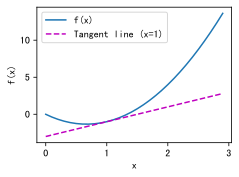

In [73]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'] )

### 2.4.3.偏导数和梯度

#### 介绍多元函数的导数

#### 令f为带有n变量的函数。 $y$相对于其$i^{th}$参数$x^i$的偏导数为:
#### $$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}. $$

#### 为了计算$\frac{\partial y}{\partial x_i}$，我们可将$x_1...x_n$视为常量，并计算$y$相对于$x_i$的导数
#### $$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = \partial_{x_i} f = \partial_i f = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

#### 可以将多元函数相对于其所有变量的偏导数连接起来以获得称为函数梯度的向量
#### 假设函数$y$的输入是$n$维向量$X$ ，输出是标量
#### 函数$f$相对于$X$的梯度是$n$偏导数的向量：
#### $$ \nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\partial_{x_1} f(\mathbf{x}), \partial_{x_2} f(\mathbf{x}), \ldots\partial_{x_n} f(\mathbf{x})\right]^\top.$$

如果没有歧义， $\nabla_{\mathbf{x}}f(\mathbf{x})$通常会替换为$\nabla_f(\mathbf{x})$


#### 对于所有$A ∈ R^{m×n}$，都有$∇xAx = A⊤$
#### 对于所有$A ∈ R^{n×m}$，都有$∇_xx ⊤A = A$
#### 对于所有$A ∈ R^{n×n}，都有$∇_xx⊤Ax = (A + A^⊤)x$
#### $∇_x∥x∥2 = ∇_xx^⊤x = 2x$

### 2.4.4.链式法则

#### 在深度学习中，所关注的梯度通常很难计算，因为我们正在使用深度嵌套的函数
#### 幸运的是，链式法则可以解决这个问题

#### $$ \frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$
#### 更多的u和x可以无限链下去

### 小结

#### 我们可以常规应用微分的基本法则计算梯度
#### 这项任务不需要动脑，所以认知力可以用在别处
#### 计算向量值函数的导数需要我们跟踪从输出到输入的变量依赖图时乘以矩阵
#### 特别时，当我们评估函数时，该图会前向遍历，计算梯度时，向后遍历

In [77]:
import math
# test3
def f(x):
    return x ** x
x = np.arange(0, 3, 0.1)
plot(x, [f(x), f(x) * (math.log(x, 10) + 1)], 'x', 'f(x)', legend=['f(x)', 'Tangent Line(x=1)'])

TypeError: only size-1 arrays can be converted to Python scalars

## 2.5.自动微分

#### 代深度学习框架都通过提供自动微分（通常缩写为 autograd）来完成计算微分
#### 当我们通过每个连续函数传递数据时，框架会构建一个计算图来跟踪每个值如何依赖于其他值
#### 自动微分通过应用链式法则的图表向后进行——反向传播

#### Autograd库在过去十年中已成为热门话题，但它们却有着悠久的历史
#### 在探索方法之前，我们首先要掌握 autograd 包

### 2.5.1.一个简单的函数

#### 假设我们感兴趣的是函数$y=2x^Tx$相对于列向量$x$的微分

In [79]:
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

#### 在我们计算y关于x的梯度之前，需要一个地方来存储梯度
#### 注意，一个标量函数关于向量 __x__ 的梯度是向量，并且与 __x__ 具有相同的形状

In [82]:
x.requires_grad_(True) # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad

In [84]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

#### 我们可以通过调用 backward() 方法来获取 $y$ 相对于 $x$ 的梯度

In [85]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

#### 验证自动梯度计算和预期结果是否相同

In [86]:
x.grad == 4 * x

tensor([True, True, True, True])